In [3]:
import pyspark as spark
import numpy as np
import pandas as pd
import sklearn
import geopandas 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
people = pd.read_csv('../data/Traffic_Crashes_-_People.csv')

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
people.describe()

VEHICLE_ID        SEAT_NO            AGE  BAC_RESULT VALUE
count  1.120504e+06  233668.000000  815745.000000       1460.000000
mean   5.337715e+05       4.165466      37.847617          0.167473
std    3.072029e+05       2.186325      17.106627          0.099561
min    2.000000e+00       1.000000    -177.000000          0.000000
25%    2.690950e+05       3.000000      25.000000          0.120000
50%    5.330980e+05       3.000000      35.000000          0.170000
75%    7.969340e+05       6.000000      50.000000          0.220000
max    1.071291e+06      12.000000     110.000000          1.000000

In [6]:
people

PERSON_ID PERSON_TYPE  \
0         O749947      DRIVER   
1         O871921      DRIVER   
2          O10018      DRIVER   
3          O10038      DRIVER   
4          O10039      DRIVER   
...           ...         ...   
1142958   P251311   PASSENGER   
1142959   P251312   PASSENGER   
1142960   P252181   PASSENGER   
1142961   P252937   PASSENGER   
1142962   P252938   PASSENGER   

                                           CRASH_RECORD_ID     RD_NO  \
0        81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
1        af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...  JD208731   
2        71162af7bf22799b776547132ebf134b5b438dcf3dac6b...  HY484534   
3        c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...  HY484750   
4        eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...  HY484778   
...                                                    ...       ...   
1142958  e45c49f1a682741b56d6a3e29785efdfe89255b7c16109...  JE266202   
1142959  e45c49f1a682741b56d6a3e29785efdfe89255b7c16109...  JE266202   
1142960  a23dc825b5744d811d9a0385cd3e5115cbdb8a8df53b28...  JE274430   
1142961  b0349a3b7af46c827f668dcf29040a8b6776dce3b3294f...  JE265717   
1142962  b0349a3b7af46c827f668dcf29040a8b6776dce3b3294f...  JE265717   

         VEHICLE_ID              CRASH_DATE  SEAT_NO        CITY STATE  \
0          834816.0  09/28/2019 03:30:00 AM      NaN     CHICAGO    IL   
1          827212.0  04/13/2020 10:50:00 PM      NaN     CHICAGO    IL   
2            9579.0  11/01/2015 05:00:00 AM      NaN         NaN   NaN   
3            9598.0  11/01/2015 08:00:00 AM      NaN         NaN   NaN   
4            9600.0  11/01/2015 10:15:00 AM      NaN         NaN   NaN   
...             ...                     ...      ...         ...   ...   
1142958   1062338.0  06/14/2021 08:02:00 PM      3.0     CHICAGO    IL   
1142959   1062338.0  06/14/2021 08:02:00 PM      4.0     CHICAGO    IL   
1142960   1065498.0  06/14/2021 11:00:00 AM      3.0  VILLA PARK    IL   
1142961   1068818.0  06/14/2021 02:35:00 PM      3.0     CHICAGO    IL   
1142962   1068818.0  06/14/2021 02:35:00 PM      6.0     CHICAGO    IL   

        ZIPCODE  ... EMS_RUN_NO     DRIVER_ACTION DRIVER_VISION  \
0         60651  ...        NaN           UNKNOWN       UNKNOWN   
1         60620  ...        NaN              NONE  NOT OBSCURED   
2           NaN  ...        NaN  IMPROPER BACKING       UNKNOWN   
3           NaN  ...        NaN           UNKNOWN       UNKNOWN   
4           NaN  ...        NaN           UNKNOWN       UNKNOWN   
...         ...  ...        ...               ...           ...   
1142958     NaN  ...        NaN               NaN           NaN   
1142959     NaN  ...        NaN               NaN           NaN   
1142960   60181  ...        NaN               NaN           NaN   
1142961   60626  ...        NaN               NaN           NaN   
1142962   60626  ...        NaN               NaN           NaN   

        PHYSICAL_CONDITION PEDPEDAL_ACTION PEDPEDAL_VISIBILITY  \
0                  UNKNOWN             NaN                 NaN   
1                   NORMAL             NaN                 NaN   
2                  UNKNOWN             NaN                 NaN   
3                  UNKNOWN             NaN                 NaN   
4                  UNKNOWN             NaN                 NaN   
...                    ...             ...                 ...   
1142958                NaN             NaN                 NaN   
1142959                NaN             NaN                 NaN   
1142960                NaN             NaN                 NaN   
1142961                NaN             NaN                 NaN   
1142962                NaN             NaN                 NaN   

        PEDPEDAL_LOCATION        BAC_RESULT BAC_RESULT VALUE CELL_PHONE_USE  
0                     NaN  TEST NOT OFFERED              NaN            NaN  
1                     NaN  TEST NOT OFFERED              NaN            NaN  
2                     NaN

In [7]:
people.isnull().sum().head(19)

PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
RD_NO                     10457
VEHICLE_ID                22459
CRASH_DATE                    0
SEAT_NO                  909295
CITY                     300591
STATE                    290836
ZIPCODE                  373771
SEX                       17137
AGE                      327218
DRIVERS_LICENSE_STATE    467279
DRIVERS_LICENSE_CLASS    558959
SAFETY_EQUIPMENT           3356
AIRBAG_DEPLOYED           21493
EJECTION                  13966
INJURY_CLASSIFICATION       584
HOSPITAL                 936362
dtype: int64

In [8]:
people['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     1048927
NONINCAPACITATING INJURY      52067
REPORTED, NOT EVIDENT         30568
INCAPACITATING INJURY         10211
FATAL                           606
Name: INJURY_CLASSIFICATION, dtype: int64

In [9]:
people['EJECTION'].value_counts()

NONE                  1061145
UNKNOWN                 61977
TOTALLY EJECTED          4114
PARTIALLY EJECTED        1064
TRAPPED/EXTRICATED        697
Name: EJECTION, dtype: int64

In [10]:
people['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              572270
USAGE UNKNOWN                                 504043
NONE PRESENT                                   35671
CHILD RESTRAINT USED                            7814
SAFETY BELT NOT USED                            6761
HELMET NOT USED                                 4201
CHILD RESTRAINT - FORWARD FACING                1993
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      1464
HELMET USED                                     1343
CHILD RESTRAINT - TYPE UNKNOWN                  1021
CHILD RESTRAINT - REAR FACING                    983
CHILD RESTRAINT NOT USED                         555
DOT COMPLIANT MOTORCYCLE HELMET                  551
BOOSTER SEAT                                     528
SHOULD/LAP BELT USED IMPROPERLY                  105
NOT DOT COMPLIANT MOTORCYCLE HELMET              102
WHEELCHAIR                                        97
CHILD RESTRAINT USED IMPROPERLY                   85
STRETCHER                                     

In [11]:
people['PERSON_TYPE'].value_counts()

DRIVER                 887298
PASSENGER              233668
PEDESTRIAN              13078
BICYCLE                  7714
NON-MOTOR VEHICLE         995
NON-CONTACT VEHICLE       210
Name: PERSON_TYPE, dtype: int64

In [12]:
people['DRIVER_VISION'].value_counts()

NOT OBSCURED              492623
UNKNOWN                   390563
OTHER                       9582
MOVING VEHICLES             5632
PARKED VEHICLES             3403
WINDSHIELD (WATER/ICE)      2822
BLINDED - SUNLIGHT          1083
TREES, PLANTS                427
BUILDINGS                    358
BLINDED - HEADLIGHTS          87
BLOWING MATERIALS             72
HILLCREST                     69
EMBANKMENT                    57
SIGNBOARD                     24
Name: DRIVER_VISION, dtype: int64

In [13]:
people['PERSON_TYPE'].value_counts()

DRIVER                 887298
PASSENGER              233668
PEDESTRIAN              13078
BICYCLE                  7714
NON-MOTOR VEHICLE         995
NON-CONTACT VEHICLE       210
Name: PERSON_TYPE, dtype: int64

In [14]:
people=people[people['INJURY_CLASSIFICATION'].isnull()==False]

In [15]:
people.describe()

VEHICLE_ID        SEAT_NO            AGE  BAC_RESULT VALUE
count  1.120242e+06  233419.000000  815720.000000       1460.000000
mean   5.337761e+05       4.167030      37.847115          0.167473
std    3.072029e+05       2.186137      17.106371          0.099561
min    2.000000e+00       1.000000    -177.000000          0.000000
25%    2.691022e+05       3.000000      25.000000          0.120000
50%    5.331045e+05       3.000000      35.000000          0.170000
75%    7.969368e+05       6.000000      50.000000          0.220000
max    1.071291e+06      12.000000     110.000000          1.000000

In [16]:
people['BAC_RESULT VALUE'].value_counts()

0.00    146
0.18    101
0.17    101
0.21     86
0.14     81
0.20     78
0.16     69
0.15     66
0.19     64
0.23     63
0.22     62
0.13     54
0.12     54
0.11     51
0.24     46
0.26     30
0.27     29
0.10     27
0.09     27
0.25     26
0.28     21
0.30     15
0.29     15
0.04     15
0.03     15
0.08     14
0.07     14
0.33     12
0.05     10
0.32      8
0.02      7
0.06      7
0.31      6
0.38      6
0.35      5
0.34      4
0.36      3
0.01      3
0.60      2
0.44      2
0.45      2
0.39      2
0.40      1
1.00      1
0.47      1
0.80      1
0.99      1
0.79      1
0.67      1
0.95      1
0.88      1
0.41      1
0.58      1
Name: BAC_RESULT VALUE, dtype: int64

In [17]:
people['PHYSICAL_CONDITION'].value_counts()

NORMAL                          607512
UNKNOWN                         282921
IMPAIRED - ALCOHOL                4411
REMOVED BY EMS                    3553
OTHER                             2556
FATIGUED/ASLEEP                   2416
EMOTIONAL                         1937
ILLNESS/FAINTED                    838
HAD BEEN DRINKING                  712
IMPAIRED - DRUGS                   530
IMPAIRED - ALCOHOL AND DRUGS       214
MEDICATED                          116
Name: PHYSICAL_CONDITION, dtype: int64

In [18]:
clean_people = people[['PERSON_ID','PERSON_TYPE','CRASH_RECORD_ID',"VEHICLE_ID",'CRASH_DATE','SEX','AGE','EJECTION','INJURY_CLASSIFICATION',"AIRBAG_DEPLOYED",'DRIVER_ACTION','PEDPEDAL_ACTION','PHYSICAL_CONDITION','BAC_RESULT VALUE','SAFETY_EQUIPMENT']]

In [19]:
clean_people

PERSON_ID PERSON_TYPE  \
0         O749947      DRIVER   
1         O871921      DRIVER   
2          O10018      DRIVER   
3          O10038      DRIVER   
4          O10039      DRIVER   
...           ...         ...   
1142958   P251311   PASSENGER   
1142959   P251312   PASSENGER   
1142960   P252181   PASSENGER   
1142961   P252937   PASSENGER   
1142962   P252938   PASSENGER   

                                           CRASH_RECORD_ID  VEHICLE_ID  \
0        81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...    834816.0   
1        af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...    827212.0   
2        71162af7bf22799b776547132ebf134b5b438dcf3dac6b...      9579.0   
3        c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...      9598.0   
4        eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...      9600.0   
...                                                    ...         ...   
1142958  e45c49f1a682741b56d6a3e29785efdfe89255b7c16109...   1062338.0   
1142959  e45c49f1a682741b56d6a3e29785efdfe89255b7c16109...   1062338.0   
1142960  a23dc825b5744d811d9a0385cd3e5115cbdb8a8df53b28...   1065498.0   
1142961  b0349a3b7af46c827f668dcf29040a8b6776dce3b3294f...   1068818.0   
1142962  b0349a3b7af46c827f668dcf29040a8b6776dce3b3294f...   1068818.0   

                     CRASH_DATE SEX   AGE EJECTION     INJURY_CLASSIFICATION  \
0        09/28/2019 03:30:00 AM   M  25.0     NONE   NO INDICATION OF INJURY   
1        04/13/2020 10:50:00 PM   M  37.0     NONE   NO INDICATION OF INJURY   
2        11/01/2015 05:00:00 AM   X   NaN     NONE   NO INDICATION OF INJURY   
3        11/01/2015 08:00:00 AM   X   NaN  UNKNOWN   NO INDICATION OF INJURY   
4        11/01/2015 10:15:00 AM   X   NaN  UNKNOWN   NO INDICATION OF INJURY   
...                         ...  ..   ...      ...                       ...   
1142958  06/14/2021 08:02:00 PM   F  18.0     NONE   NO INDICATION OF INJURY   
1142959  06/14/2021 08:02:00 PM   F  21.0     NONE   NO INDICATION OF INJURY   
1142960  06/14/2021 11:00:00 AM   M  19.0     NONE   NO INDICATION OF INJURY   
1142961  06/14/2021 02:35:00 PM   M  20.0     NONE   NO INDICATION OF INJURY   
1142962  06/14/2021 02:35:00 PM   F  20.0     NONE  NONINCAPACITATING INJURY   

            AIRBAG_DEPLOYED     DRIVER_ACTION PEDPEDAL_ACTION  \
0        DEPLOYMENT UNKNOWN           UNKNOWN             NaN   
1            DID NOT DEPLOY              NONE             NaN   
2        DEPLOYMENT UNKNOWN  IMPROPER BACKING             NaN   
3        DEPLOYMENT UNKNOWN           UNKNOWN             NaN   
4        DEPLOYMENT UNKNOWN           UNKNOWN             NaN   
...                     ...               ...             ...   
1142958     DEPLOYED, FRONT               NaN             NaN   
1142959     DEPLOYED, FRONT               NaN             NaN   
1142960      DID NOT DEPLOY               NaN             NaN   
1142961      DID NOT DEPLOY               NaN             NaN   
1142962      DID NOT DEPLOY               NaN             NaN   

        PHYSICAL_CONDITION  BAC_RESULT VALUE  SAFETY_EQUIPMENT  
0                  UNKNOWN               NaN      NONE PRESENT  
1                   NORMAL               NaN  SAFETY BELT USED  
2                  UNKNOWN               NaN     USAGE UNKNOWN  
3                  UNKNOWN               NaN     USAGE UNKNOWN  
4                  UNKNOWN               NaN     USAGE UNKNOWN  
...                    ...               ...               ...  
1142958                NaN               NaN  SAFETY BELT USED  
1142959                NaN               NaN  SAFETY BELT USED  
1142960                NaN               NaN  SAFETY BELT USED  
1142961                NaN               NaN  SAFETY BELT USED  
1142962                NaN               NaN  SAFETY BELT USED  

[1142379 rows x 15 columns]

In [20]:
clean_people.isnull().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 22137
CRASH_DATE                     0
SEX                        16684
AGE                       326659
EJECTION                   13462
INJURY_CLASSIFICATION          0
AIRBAG_DEPLOYED            20996
DRIVER_ACTION             235342
PEDPEDAL_ACTION          1121282
PHYSICAL_CONDITION        234663
BAC_RESULT VALUE         1140919
SAFETY_EQUIPMENT            2856
dtype: int64

In [21]:
clean_people['AIRBAG_DEPLOYED'].value_counts()

DID NOT DEPLOY                            663464
DEPLOYMENT UNKNOWN                        218630
NOT APPLICABLE                            172296
DEPLOYED, FRONT                            35073
DEPLOYED, COMBINATION                      22338
DEPLOYED, SIDE                              9120
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       462
Name: AIRBAG_DEPLOYED, dtype: int64

In [22]:
clean_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              572263
USAGE UNKNOWN                                 503982
NONE PRESENT                                   35656
CHILD RESTRAINT USED                            7814
SAFETY BELT NOT USED                            6761
HELMET NOT USED                                 4201
CHILD RESTRAINT - FORWARD FACING                1993
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      1464
HELMET USED                                     1343
CHILD RESTRAINT - TYPE UNKNOWN                  1021
CHILD RESTRAINT - REAR FACING                    983
CHILD RESTRAINT NOT USED                         555
DOT COMPLIANT MOTORCYCLE HELMET                  551
BOOSTER SEAT                                     528
SHOULD/LAP BELT USED IMPROPERLY                  105
NOT DOT COMPLIANT MOTORCYCLE HELMET              101
WHEELCHAIR                                        97
CHILD RESTRAINT USED IMPROPERLY                   85
STRETCHER                                     

In [23]:
clean_people['AGE'].value_counts()

 25.0     23542
 26.0     23349
 27.0     23138
 24.0     22630
 28.0     22602
          ...  
-49.0         1
-40.0         1
-177.0        1
 106.0        1
-47.0         1
Name: AGE, Length: 115, dtype: int64

In [24]:
clean_people['EJECTION'].value_counts()

NONE                  1061084
UNKNOWN                 61958
TOTALLY EJECTED          4114
PARTIALLY EJECTED        1064
TRAPPED/EXTRICATED        697
Name: EJECTION, dtype: int64

In [25]:
clean_people['AIRBAG_DEPLOYED'].value_counts()

DID NOT DEPLOY                            663464
DEPLOYMENT UNKNOWN                        218630
NOT APPLICABLE                            172296
DEPLOYED, FRONT                            35073
DEPLOYED, COMBINATION                      22338
DEPLOYED, SIDE                              9120
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       462
Name: AIRBAG_DEPLOYED, dtype: int64

In [26]:
clean_people["SAFETY_EQUIPMENT"] = clean_people["SAFETY_EQUIPMENT"].fillna('NONE')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/1271909792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["SAFETY_EQUIPMENT"] = clean_people["SAFETY_EQUIPMENT"].fillna('NONE')


In [27]:
clean_people["SEX"] = clean_people["SEX"].fillna('UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2153833290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["SEX"] = clean_people["SEX"].fillna('UNKNOWN')


In [28]:
clean_people["VEHICLE_ID"] = clean_people["VEHICLE_ID"].fillna('UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/379687588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["VEHICLE_ID"] = clean_people["VEHICLE_ID"].fillna('UNKNOWN')


In [29]:
clean_people["EJECTION"] = clean_people["EJECTION"].fillna('NONE')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/928250509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["EJECTION"] = clean_people["EJECTION"].fillna('NONE')


In [30]:
clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2243105180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')


In [31]:
clean_people['BAC_RESULT VALUE'] = clean_people['BAC_RESULT VALUE'].fillna('0')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2738179663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people['BAC_RESULT VALUE'] = clean_people['BAC_RESULT VALUE'].fillna('0')


In [32]:
clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2243105180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')


In [33]:
clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2243105180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')


In [34]:
clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2243105180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')


In [35]:
clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2243105180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people["AIRBAG_DEPLOYED"] = clean_people["AIRBAG_DEPLOYED"].fillna('DEPLOYMENT UNKNOWN')


In [36]:
clean_people['PEDPEDAL_ACTION']= clean_people['PEDPEDAL_ACTION'].fillna('UNKNOWN/NA')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/1341549772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people['PEDPEDAL_ACTION']= clean_people['PEDPEDAL_ACTION'].fillna('UNKNOWN/NA')


In [37]:
clean_people['PHYSICAL_CONDITION']= clean_people['PHYSICAL_CONDITION'].fillna('UNKNOWN')

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/98161819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_people['PHYSICAL_CONDITION']= clean_people['PHYSICAL_CONDITION'].fillna('UNKNOWN')


In [38]:
clean_people.isnull().sum()

PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                    0
CRASH_DATE                    0
SEX                           0
AGE                      326659
EJECTION                      0
INJURY_CLASSIFICATION         0
AIRBAG_DEPLOYED               0
DRIVER_ACTION            235342
PEDPEDAL_ACTION               0
PHYSICAL_CONDITION            0
BAC_RESULT VALUE              0
SAFETY_EQUIPMENT              0
dtype: int64

In [39]:
clean_people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEX', 'AGE', 'EJECTION', 'INJURY_CLASSIFICATION',
       'AIRBAG_DEPLOYED', 'DRIVER_ACTION', 'PEDPEDAL_ACTION',
       'PHYSICAL_CONDITION', 'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT'],
      dtype='object')

In [45]:
dum_clean_people = pd.get_dummies(clean_people,columns = ['SEX','EJECTION', 'INJURY_CLASSIFICATION',
       'AIRBAG_DEPLOYED', 'PEDPEDAL_ACTION',
       'PHYSICAL_CONDITION', 'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT'], drop_first = True)

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_7947/2521967114.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr,dtype = np.bool))


<AxesSubplot:>

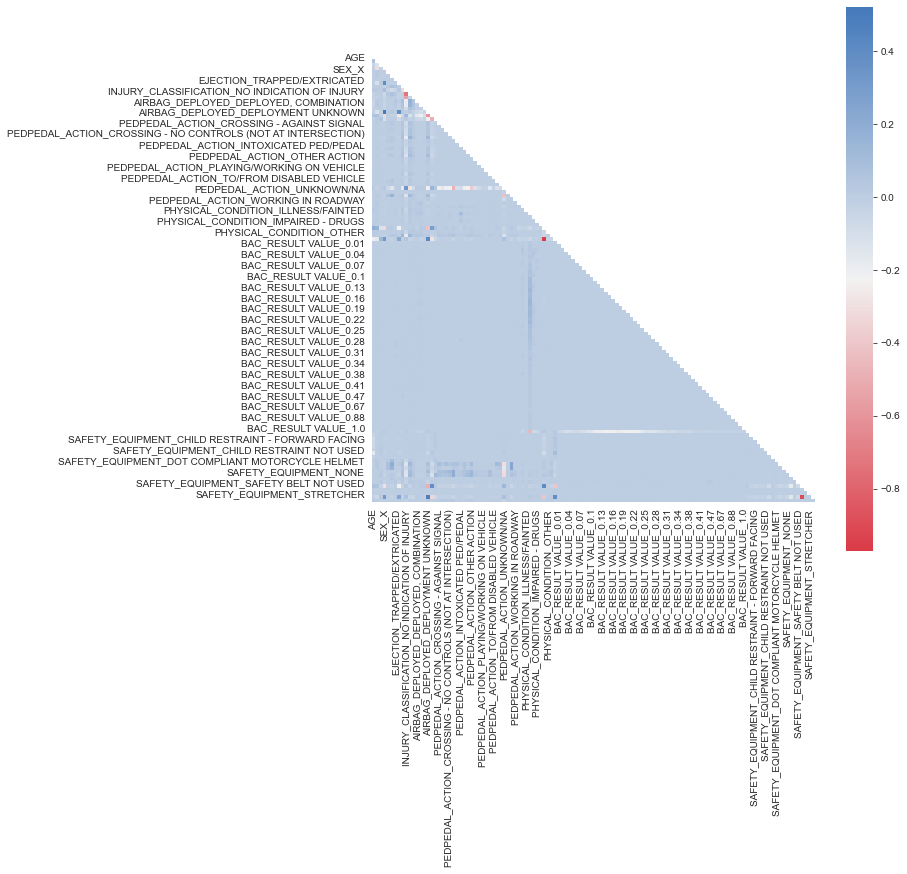

In [46]:
corr = dum_clean_people.corr()
mask = np.triu(np.ones_like(corr,dtype = np.bool))
sns.set_style(style = 'white')
f,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(10,250,as_cmap = True)
sns.heatmap(corr,mask=mask,cmap=cmap,
           square = True
           )

In [47]:
clean_people.to_csv('clean_people.csv')